<a href="https://colab.research.google.com/github/Gabrinetio/Data_Science/blob/main/Analise_Vendas_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Vendas do E-commerce Olist (2016-2018)

**Autor:** Gabriel Santana
**Data:** 09 de setembro de 2025

## 1. Introdução

Este notebook contém uma análise exploratória de dados (EDA) do dataset público da Olist, a maior loja de departamentos em marketplaces do Brasil. O objetivo deste projeto é extrair insights acionáveis a partir dos dados de vendas realizados entre 2016 e 2018 para responder a três perguntas de negócio fundamentais:

* **Perfil Geográfico:** De onde vêm nossos clientes?
* **Análise Temporal:** Quando eles realizam as compras?
* **Perfil de Produtos:** O que eles estão comprando?

O dataset utilizado pode ser encontrado no Kaggle: [Brazilian E-commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 2. Configuração e Carregamento de Dados

# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montando o Google Drive para acessar os arquivos
print("Conectando ao Google Drive...")
drive.mount('/content/drive')

# Definindo o caminho para a pasta com os arquivos
caminho_dos_arquivos = '/content/drive/MyDrive/Arquivos_Colab/Analise_Vendas_Olist/'

# Carregando os datasets
print("Carregando datasets...")
try:
    clientes = pd.read_csv(caminho_dos_arquivos + 'olist_customers_dataset.csv')
    pedidos = pd.read_csv(caminho_dos_arquivos + 'olist_orders_dataset.csv')
    itens_pedidos = pd.read_csv(caminho_dos_arquivos + 'olist_order_items_dataset.csv')
    produtos = pd.read_csv(caminho_dos_arquivos + 'olist_products_dataset.csv')
    print("Dados carregados com sucesso!")
except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado - {e.filename}. Verifique o caminho e o nome dos arquivos.")

Conectando ao Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Carregando datasets...
Dados carregados com sucesso!


## 3. Limpeza e Preparação dos Dados

Nesta etapa, realizamos a limpeza e a transformação dos dados para garantir a qualidade da análise. As principais ações foram:

* Remoção de pedidos com status de entrega nulo, que não foram concluídos.
* Conversão das colunas de data do tipo `object` (texto) para `datetime` (data/hora), permitindo análises temporais.
* União (merge) dos diferentes datasets para criar uma visão unificada e completa dos dados.

In [ ]:
# Tratando valores nulos e convertendo tipos de dados na tabela de pedidos
pedidos.dropna(subset=['order_approved_at', 'order_delivered_customer_date'], inplace=True)
colunas_de_data = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
for col in colunas_de_data:
    pedidos[col] = pd.to_datetime(pedidos[col])

# Unindo os dataframes para criar o dataset final de análise
df_analise = pd.merge(clientes, pedidos, on='customer_id')
df_completo = pd.merge(df_analise, itens_pedidos, on='order_id')
df_completo = pd.merge(df_completo, produtos, on='product_id')

print("Limpeza e união dos dados concluídas.")
print(f"O dataset final possui {df_completo.shape[0]} linhas e {df_completo.shape[1]} colunas.")

Limpeza e união dos dados concluídas.
O dataset final possui 110181 linhas e 26 colunas.


## 4. Análise Exploratória de Dados (EDA)

Com os dados limpos e preparados, iniciamos a análise para responder às nossas perguntas de negócio.

### 4.1. De onde vêm nossos clientes?

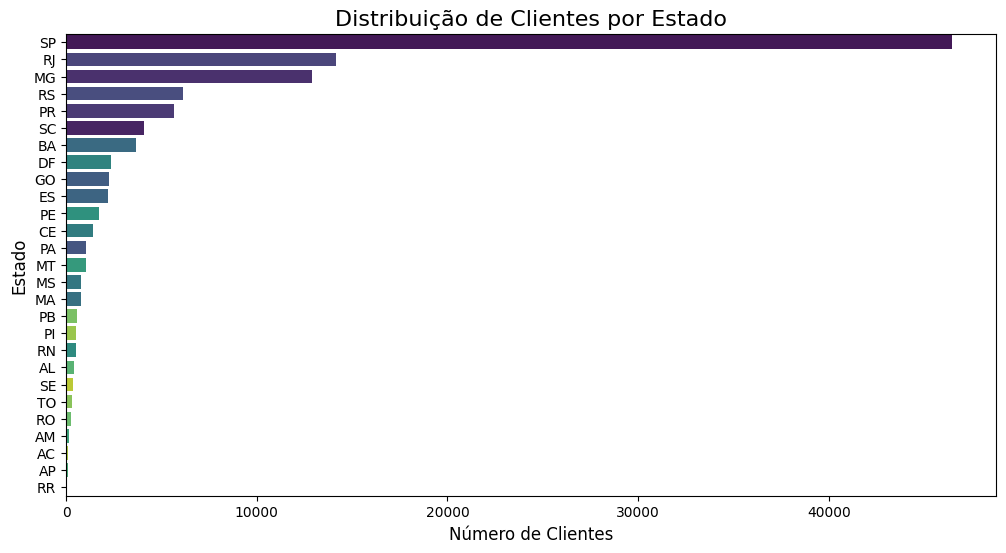

In [ ]:
# Análise de clientes por estado
plt.figure(figsize=(12, 6))
sns.countplot(y=df_completo['customer_state'], order=df_completo['customer_state'].value_counts().index, palette='viridis', hue=df_completo['customer_state'], legend=False)
plt.title('Distribuição de Clientes por Estado', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.show()

**Insight:** A análise da distribuição geográfica dos clientes mostra uma concentração massiva no estado de São Paulo (SP), que representa mais de 40% de nossa base de clientes. Os estados da região Sudeste (SP, RJ, MG) dominam o volume de vendas, indicando a principal área de atuação da empresa.

### 4.2. Quando nossos clientes compram?

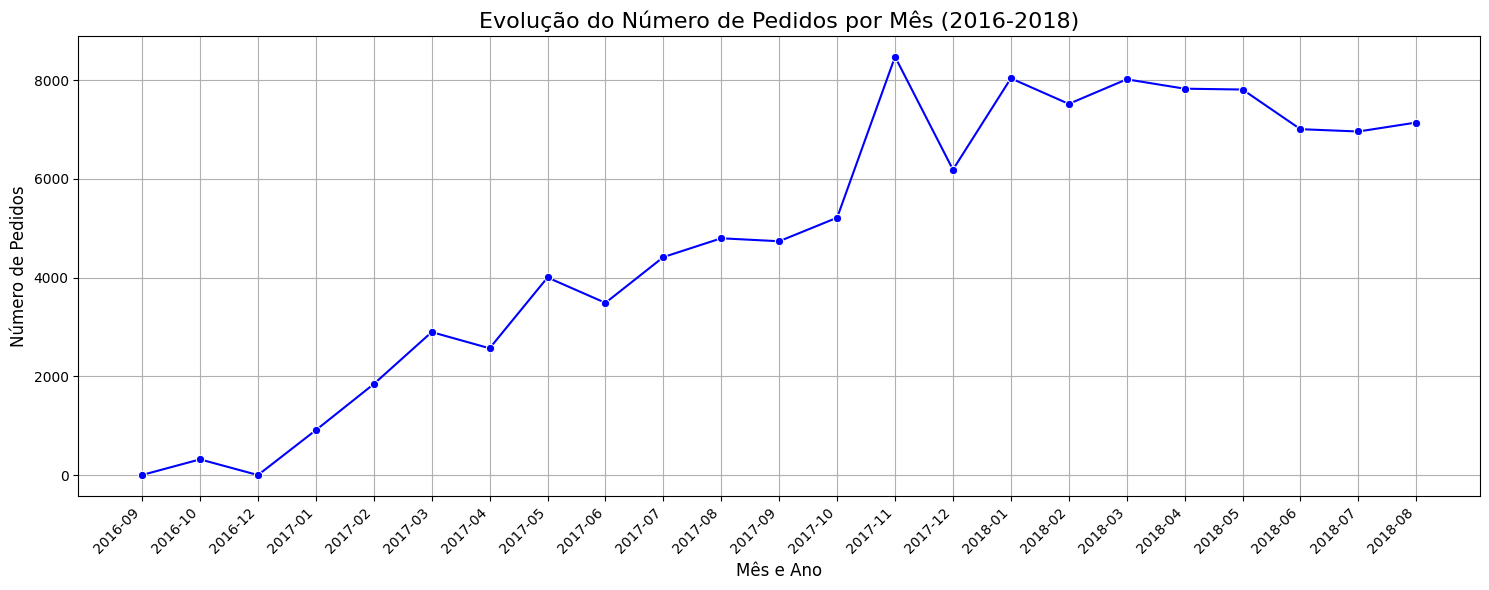

In [ ]:
# Criando uma coluna com o formato 'Ano-Mês'
df_completo['purchase_month_year'] = df_completo['order_purchase_timestamp'].dt.to_period('M')
pedidos_por_mes = df_completo['purchase_month_year'].value_counts().sort_index()
pedidos_por_mes.index = pedidos_por_mes.index.astype(str)

# Criando o gráfico de linhas
plt.figure(figsize=(15, 6))
sns.lineplot(x=pedidos_por_mes.index, y=pedidos_por_mes.values, marker='o', color='b')
plt.title('Evolução do Número de Pedidos por Mês (2016-2018)', fontsize=16)
plt.xlabel('Mês e Ano', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:** O gráfico da evolução de pedidos ao longo do tempo revela uma clara tendência de crescimento entre 2017 e 2018. Além disso, identificamos um pico de vendas significativo em novembro de 2017, fortemente correlacionado com o período da Black Friday, que se mostra a data comercial mais importante para a empresa.

### 4.3. O que nossos clientes compram?

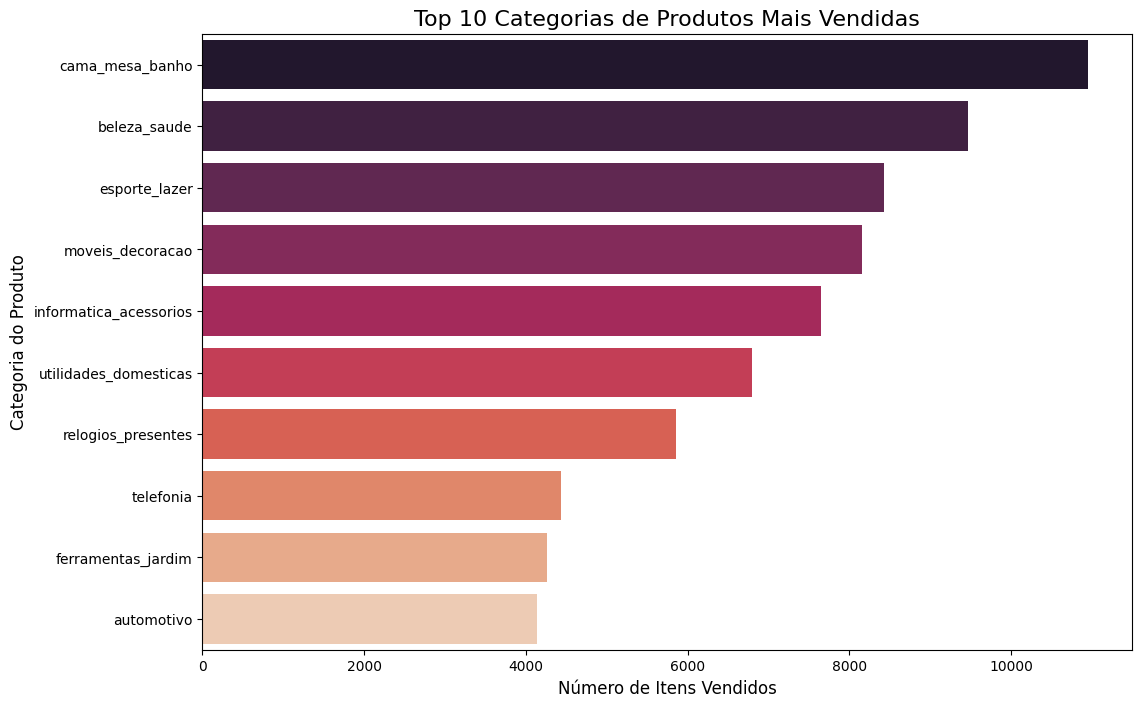

In [ ]:
# Contando o número de itens vendidos por categoria
contagem_categorias = df_completo.dropna(subset=['product_category_name'])['product_category_name'].value_counts()

# Criando um gráfico de barras para visualizar as top 10 categorias
plt.figure(figsize=(12, 8))
sns.barplot(y=contagem_categorias.index[:10], x=contagem_categorias.values[:10], orient='h', palette='rocket', hue=contagem_categorias.index[:10], legend=False)
plt.title('Top 10 Categorias de Produtos Mais Vendidas', fontsize=16)
plt.xlabel('Número de Itens Vendidos', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)
plt.show()

**Insight:** A categoria "cama_mesa_banho" lidera as vendas com uma margem expressiva, seguida por "beleza_saude" e "esporte_lazer". Isso define o perfil da Olist como um e-commerce com forte apelo em produtos para a casa e bem-estar pessoal. A empresa possui uma dependência significativa de sua principal categoria de produtos.

## 5. Conclusões Finais

A análise exploratória dos dados da Olist nos permitiu extrair os seguintes insights estratégicos:

* **Foco no Sudeste:** A base de clientes está fortemente concentrada na região Sudeste, especialmente em São Paulo, o que deve guiar as estratégias de logística e marketing.
* **Importância da Black Friday:** Novembro é o mês de maior volume de vendas, exigindo planejamento de estoque e campanhas promocionais focadas para maximizar o resultado.
* **Perfil "Casa e Bem-Estar":** O negócio é sustentado por categorias de produtos relacionados ao lar e cuidados pessoais, com uma forte liderança de "cama_mesa_banho". Ações de cross-sell com categorias adjacentes (ex: decoração, móveis) podem aumentar o ticket médio dos clientes.

Este projeto demonstra um ciclo completo de análise de dados, desde a limpeza e preparação até a geração de insights de negócio acionáveis.